In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
# Load dataset
df = pd.read_csv("customer_behavior_analytcis.csv")
print(df.head())

   total_purchases  avg_cart_value  total_time_spent  product_click  \
0              7.0          129.34             52.17           18.0   
1             22.0           24.18              9.19           15.0   
2              2.0           32.18             90.69           50.0   
3             25.0           26.85             11.22           16.0   
4              7.0          125.45             34.19           30.0   

   discount_counts customer_id  
0              0.0     CM00000  
1              7.0     CM00001  
2              2.0     CM00002  
3             10.0     CM00003  
4              3.0     CM00004  


In [3]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 total_purchases     20
avg_cart_value      20
total_time_spent     0
product_click       20
discount_counts      0
customer_id          0
dtype: int64


In [4]:
# Check for infinite values
print("Checking for infinite values in DataFrame:")
print(df.isin([np.inf, -np.inf]).sum())

Checking for infinite values in DataFrame:
total_purchases     0
avg_cart_value      0
total_time_spent    0
product_click       0
discount_counts     0
customer_id         0
dtype: int64


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


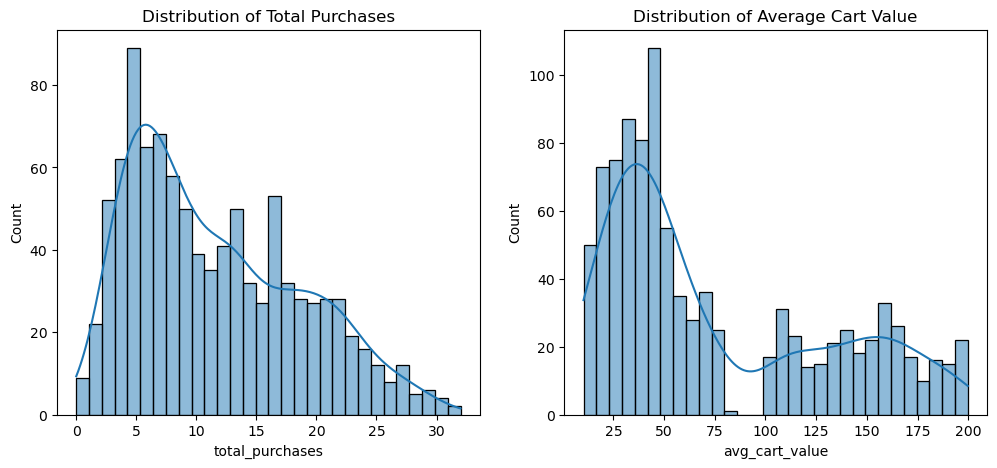

In [5]:
# Visualize distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['total_purchases'], bins=30, kde=True, ax=axes[0])
sns.histplot(df['avg_cart_value'], bins=30, kde=True, ax=axes[1])
axes[0].set_title('Distribution of Total Purchases')
axes[1].set_title('Distribution of Average Cart Value')
plt.show()

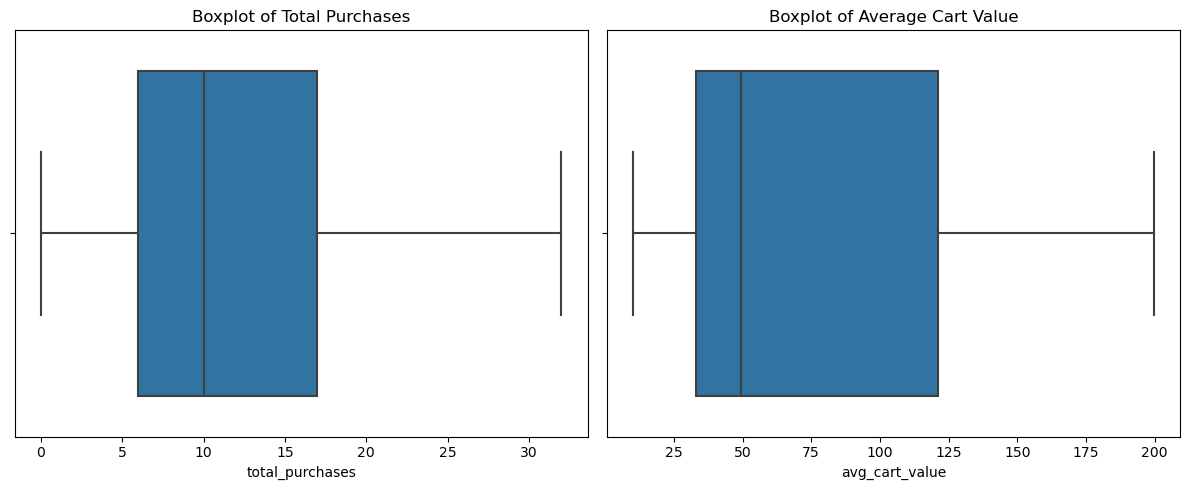

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=df['total_purchases'], ax=axes[0])
axes[0].set_title('Boxplot of Total Purchases')

sns.boxplot(x=df['avg_cart_value'], ax=axes[1])
axes[1].set_title('Boxplot of Average Cart Value')
plt.tight_layout()
plt.show()

In [7]:
print(sorted(df['total_purchases'].unique()))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, nan, 32.0]


In [8]:
print(sorted(df['avg_cart_value'].unique()))

[10.44, 10.52, 10.74, 10.85, 11.02, 11.08, 11.48, 11.88, 12.61, 13.01, 13.08, 13.31, 13.42, 13.48, 13.66, 13.98, 14.1, 14.26, 14.82, 15.15, 15.48, 15.6, 16.21, 16.25, 16.43, 16.65, 16.87, 17.26, 17.46, 18.26, 18.32, 18.6, 18.73, 18.81, 18.82, 18.85, 18.88, 18.95, 18.98, 19.2, 19.32, 19.55, 19.81, 20.38, 20.39, 20.49, 20.57, 20.62, 20.68, 20.72, 20.75, 20.83, 20.89, 21.14, 21.18, 21.48, 21.73, 21.74, 21.78, 21.85, 21.88, 22.14, 22.75, 22.95, 23.24, 23.37, 23.6, 23.67, 23.91, 24.03, 24.07, 24.18, 24.34, 24.8, 25.33, 25.46, 25.47, 25.89, 26.23, 26.34, 26.35, 26.38, 26.85, 26.86, 27.01, 27.37, 27.41, 27.45, 27.63, 27.84, 28.13, 28.16, 28.58, 28.7, 28.97, 29.04, 29.22, 29.35, 29.58, 29.82, 29.85, 29.86, 30.23, 30.41, 30.98, 31.28, 31.48, 31.58, 31.65, 31.67, 31.79, 32.03, 32.18, 32.21, 32.39, 32.63, 33.29, 33.38, 33.61, 33.67, 33.7, 33.72, 33.9, 34.02, 34.13, 34.24, 34.31, 34.68, 34.74, 34.97, 35.1, 35.12, 35.3, 35.76, 35.83, 35.9, 35.99, 36.2, 36.35, 36.46, 36.53, 36.72, 36.88, 37.01, 37.0

In [9]:
# Define imputers
median_imputer = SimpleImputer(strategy='median')
mean_imputer = SimpleImputer(strategy='mean')

# Apply imputations
df['total_purchases'] = median_imputer.fit_transform(df[['total_purchases']])
df['product_click'] = median_imputer.fit_transform(df[['product_click']])
df['avg_cart_value'] = mean_imputer.fit_transform(df[['avg_cart_value']])

In [10]:
# Summary statistics
print(df.describe())

       total_purchases  avg_cart_value  total_time_spent  product_click  \
count       999.000000      999.000000        999.000000     999.000000   
mean         11.539540       75.457978         49.348759      28.093093   
std           6.949156       54.513261         32.730973      16.164124   
min           0.000000       10.260000          5.120000       4.000000   
25%           6.000000       33.350000         22.375000      16.000000   
50%          10.000000       49.920000         40.360000      21.000000   
75%          17.000000      118.490000         77.170000      45.000000   
max          32.000000      199.770000        119.820000      73.000000   

       discount_counts  
count       999.000000  
mean          4.313313  
std           4.532772  
min           0.000000  
25%           1.000000  
50%           2.000000  
75%           8.000000  
max          21.000000  


<Figure size 1200x600 with 0 Axes>

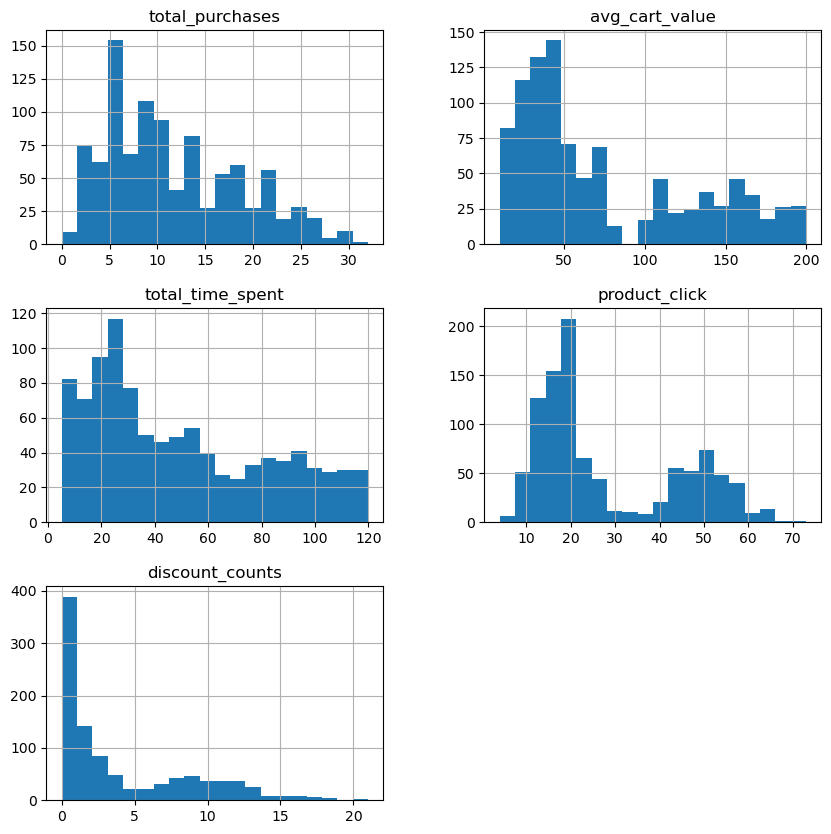

In [11]:
# Visualize distributions
plt.figure(figsize=(12, 6))
df.hist(bins=20, figsize=(10, 10))
plt.show()

In [12]:
# Drop customer_id and scale features
scaler = StandardScaler()
df_cluster = df.drop(columns=['customer_id'])
df_scaled = scaler.fit_transform(df_cluster)

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


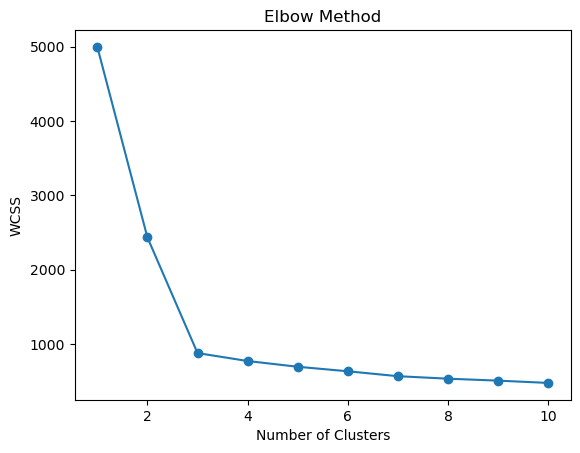

In [13]:
# Finding optimal clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
# Plot Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

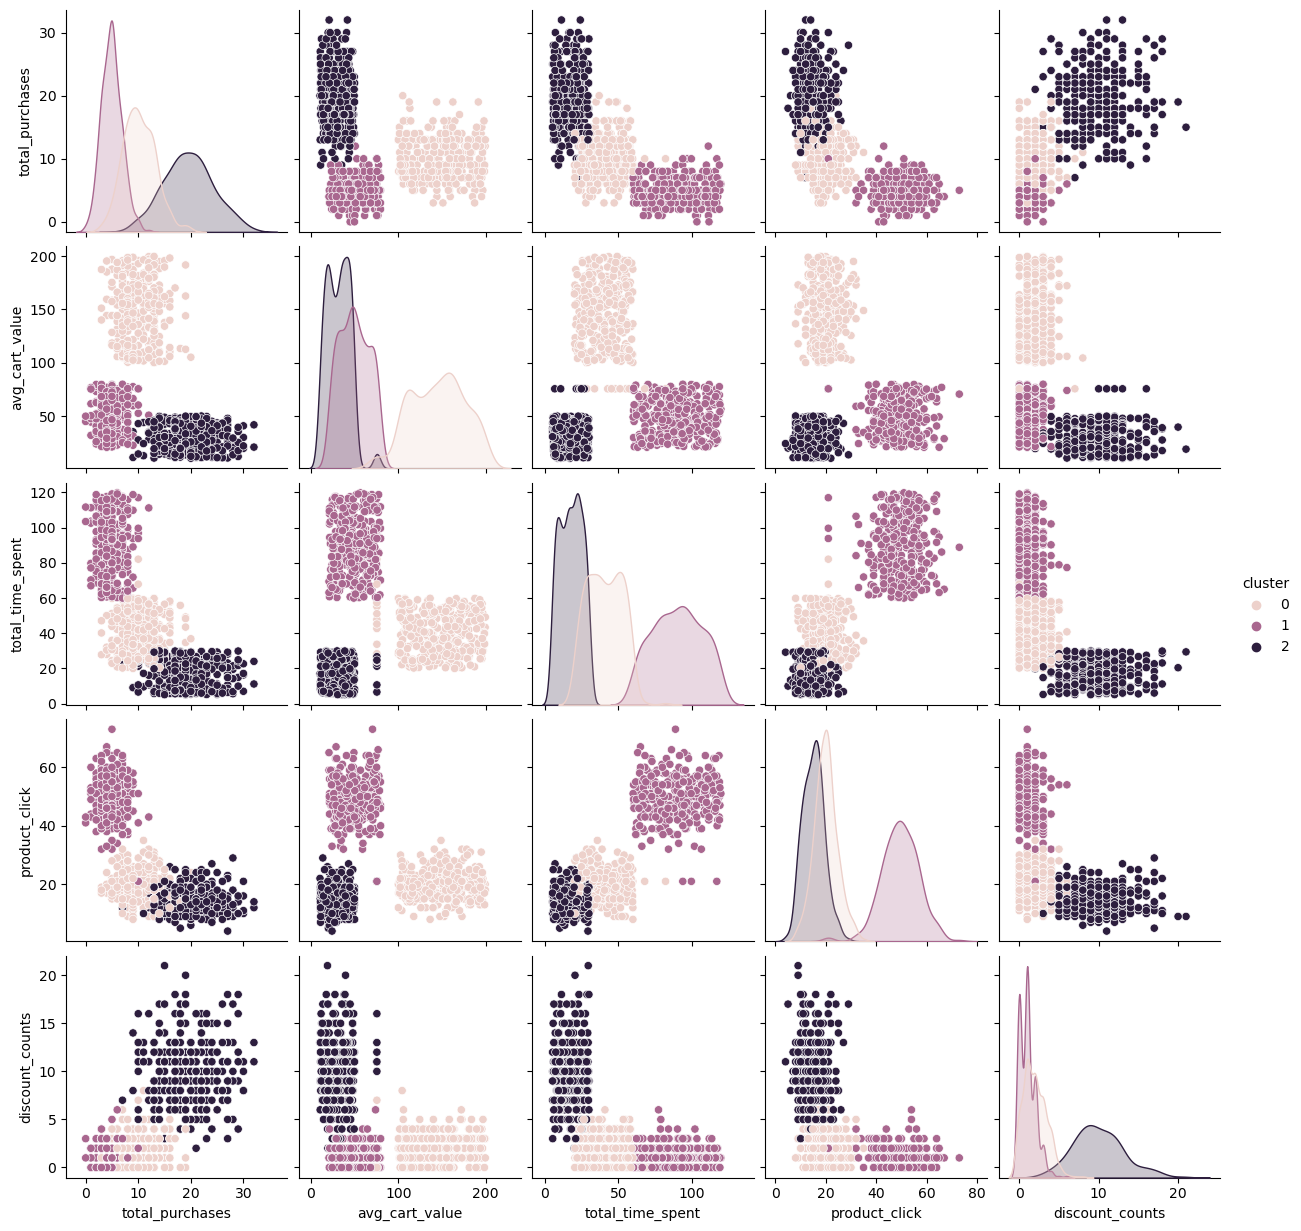

In [14]:
# Applying K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_scaled)
# Visualizing Clusters
sns.pairplot(df, hue='cluster', diag_kind='kde')
plt.show()

In [15]:
# Train XGBoost classifier
X = df.drop(columns=['cluster', 'customer_id'])
y = df['cluster']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [18]:
y_pred = model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))

XGBoost Accuracy: 0.995
